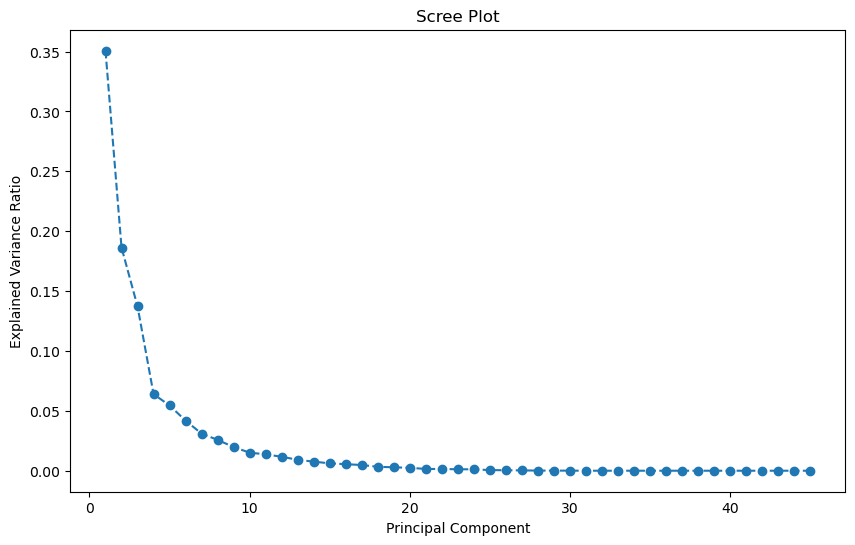

PCA model saved to pca_model.joblib
Transformed data saved to /Users/germankosenkov/Code projects/S&D estimation:forecasting/Indonesian S&D/New/Code/5.PCA/PCA.xlsx


In [6]:
import pandas as pd
import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the scaler from the file
scaler_file_path = '/Users/germankosenkov/Code projects/S&D estimation:forecasting/Indonesian S&D/New/Code/4.Scaling/scaler.joblib'  # Replace with your scaler file path
loaded_scaler = joblib.load(scaler_file_path)

# Load the data that needs to be standardized
data_file_path = '/Users/germankosenkov/Code projects/S&D estimation:forecasting/Indonesian S&D/New/Code/4.Scaling/standardized_data.xlsx'  # Replace with your data file path
data = pd.read_excel(data_file_path)

# Standardize the data using the loaded scaler
standardized_data = loaded_scaler.transform(data)

# Apply PCA to the standardized data
pca = PCA()
transformed_data = pca.fit_transform(standardized_data)

# Save the fitted PCA model
pca_file_path = 'pca_model.joblib'  # Replace with your desired file path for the PCA model
joblib.dump(pca, pca_file_path)

# Save the transformed data
transformed_data_file_path = '/Users/germankosenkov/Code projects/S&D estimation:forecasting/Indonesian S&D/New/Code/5.PCA/PCA.xlsx'  # Replace with your desired file path for the transformed data
pd.DataFrame(transformed_data).to_excel(transformed_data_file_path, index=False)

# Generate the scree plot to find out how many PCAs to keep
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

print(f"PCA model saved to {pca_file_path}")
print(f"Transformed data saved to {transformed_data_file_path}")
